In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

# X -= np.mean(X, 0)

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
l1_min_c(X, y, loss='log')

0.014306151645207437

In [4]:
# 最小的C值*[1, 1000]的50个点的等比数列
cs = l1_min_c(X, y, loss='log') * np.logspace(0, 3)

In [5]:
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
coefs_ = np.array(coefs_)
coefs_.shape

(50, 4)

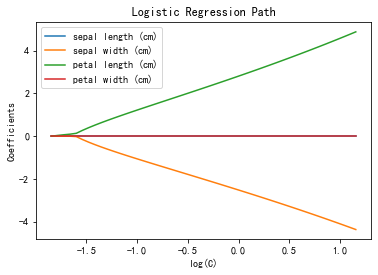

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(np.log10(cs), coefs_[:, 0], label=iris.feature_names[0])
plt.plot(np.log10(cs), coefs_[:, 1], label=iris.feature_names[1])
plt.plot(np.log10(cs), coefs_[:, 2], label=iris.feature_names[2])
plt.plot(np.log10(cs), coefs_[:, 3], label=iris.feature_names[3])
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.legend()
plt.show()

C值越小，4个属性的值都趋于0，也就是向量w越稀疏
C值越大，4个属性的值都不等于0，也就是向量w越稠密